Program : Playground 1

Purpose : An elementary attempt at derivatives, integrals
and T.S.E.s.

Author : Josh B.    Date : 08.09.2024

Begin Program                       

Imported Libraries                    

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

    #::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
    '                       f(x) Function                       '
    #************************************************************
    ' The desired function to have a derivative be taken of.    '
    '___________________________________________________________'
    ' Inputs:                                                   '
    ' -------                                                   '
    ' x - Array-like                                            '
    '                                                           '
    ' Outputs:                                                  '
    ' --------                                                  '
    ' val - Array-like                                          '
    '                                                           '
    #::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::

In [12]:
def f ( x ) :

    val = np.sin ( x )
    #val = x * x
    #np.exp ( -3 * x )

    return val

    #::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
    '                   factorial Function                      '
    #************************************************************
    ' Calculate nth factorial.                                  '
    '___________________________________________________________'
    ' Inputs:                                                   '
    ' -------                                                   '
    ' n - int, the order of factorial                           '
    '                                                           '
    ' Outputs:                                                  '
    ' --------                                                  '
    ' val - int, the value of factorial                         '
    '                                                           '
    #::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::

In [13]:
def fact ( n ) :

    val = 1

    for i in range ( 1 , n + 1) :

        val *= i

    return val

    #::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
    '                   Derivative Function                     '
    #************************************************************
    ' Find the derivative of the provided function              '
    '___________________________________________________________'
    ' Inputs:                                                   '
    ' -------                                                   '
    ' pnt - float, point of interest.                           '
    '                                                           '
    ' Outputs:                                                  '
    ' --------                                                  '
    ' val - float, the value of the derivative at a point       '
    '                                                           '
    #::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::

In [14]:
def ddx ( inp_arr ) :

    out_arr = []

    #_________________________________
    # deciding difference method and
    # calculating concomitant value

    for i in range( len ( inp_arr ) ) :

        if i == 0 :

            p1 = inp_arr [ i ]
            p2 = inp_arr [ i + 1 ]

            val = (p2 - p1) / h
        
        elif i == len ( inp_arr ) - 1 :

            p1 = inp_arr [ i - 1 ]
            p2 = inp_arr [ i ]

            val = (p2 - p1) / h

        else :

            p1 = inp_arr [ i - 1 ]
            p2 = inp_arr [ i + 1]

            val = (p2 - p1) / ( 2 * h )

        out_arr.append ( val )

    return out_arr

    #::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
    '                    Integral Function                     '
    #************************************************************
    ' Find the integral of the provided function, using the     ' 
    ' trapezoidal rule.                                         '
    '___________________________________________________________'
    ' Inputs:                                                   '
    ' -------                                                   '
    ' inp_arr - Array-like, the function to find the.           '
    ' integral of.                                              '
    '                                                           '
    ' Outputs:                                                  '
    ' --------                                                  '
    ' I - float, the definite integral of provided              '
    ' function.                                                 '
    '                                                           '
    #::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::

In [15]:
def trap ( inp_arr ) :

    #______________
    # Weight array

    w = 2 * np.ones_like ( inp_arr )
    w [ 0 ] = 1
    w [ len ( w ) - 1 ] = 1

    #____________________________
    # Getting value for integral

    I = ( h / 2 ) * np.sum ( w * f ( inp_arr ) )

    return I

    #::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
    '                      T.S.E. Function                      '
    #************************************************************
    ' Find the T.S.E. series expansion to desired order.        '
    '___________________________________________________________'
    ' Inputs:                                                   '
    ' -------                                                   '
    ' n - int, the desired order.                               '
    '                                                           '
    ' arr - array, an array the represents the domain.          '
    '                                                           '
    ' Outputs:                                                  '
    ' --------                                                  '
    ' tsv - array, the T.S.E. of function, to desired order.    '
    '                                                           '
    #::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::

In [16]:
def tse ( n , inp_arr ) :

    #_______________________________________________________________________
    # lists of orders of derivative and their evalutaion at expansion point

    ddx_l = [ f(inp_arr) ]
    ddx0_l = [ round ( f ( inp_arr ) [ in0 ] , 1 ) ]

    tsv = 0 # init value of TSE

    #_________________________________________________
    # Calculating future derivatives and their values

    for i in range ( 1 , n + 1 ) :

        dov = ddx ( ddx_l [ i - 1 ] )

        ddx_l.append ( dov )
        ddx0_l.append( round ( dov [ in0 ] , 1 ) )

    #_______________________
    # Updating value of tsv

    for i in range ( n + 1 ) :

        tsv += ddx0_l [ i ] * inp_arr ** i / fact ( i )
        
    return tsv

Initial values and arrays

In [17]:
#_____________
# Lower bound

#a = float( input ( 'Enter the lower bound of desired interval : ' ) )
a=-3*np.pi

#_____________
# Upper bound

#b = float ( input ( 'Enter the upper bound of desired interval : ' ) )
b=3*np.pi
#__________________________________
# Distance between adjacent points

#h = float ( input ( 'Enter the desired step size : ' ) )
h=.01

#________________
# Interval array

arr = np.arange ( a , b , h )

#_________________________________
# index of entry in arr nearest 0

in0 = np.abs( arr - 0 ).argmin()

#pt = input ( 'Would you like to see a plot? [y/n] ' )
pt = 'y'

#______________________
# Yes list (for later)

yl = [ 'y' , 'Y' , 'yes' , 'Yes' ]

MAIN

In [18]:
#______________________
# f(x) intitialization

fx = f ( arr )

#__________________________
# Derivative intialization

dfdx = ddx ( fx )

#________________________
# Integral intialization

intf = trap ( arr )

print('The value of the integral from %.3e to %.3e is %.3e.' % (a , b , intf ))

The value of the integral from -9.425e+00 to 9.425e+00 is -4.566e-05.


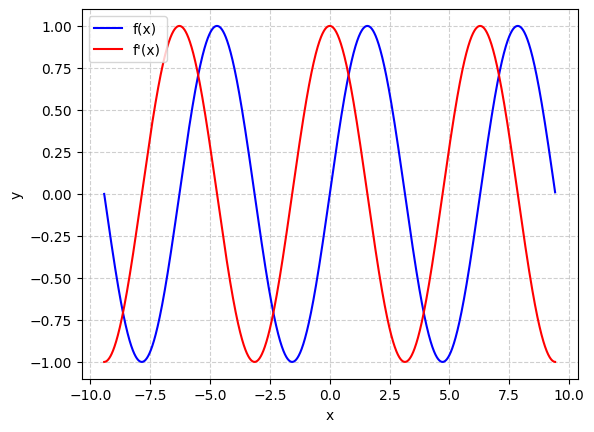

In [19]:
plt.figure()

plt.plot ( arr , fx , label = 'f(x)' , color = 'b')
plt.plot ( arr , dfdx , label = 'f\'(x)' , color  ='r' )

plt.xlabel('x')
plt.ylabel('y')

plt.grid ( ls = '--' , alpha = 0.6 )
plt.legend()

plt.show()

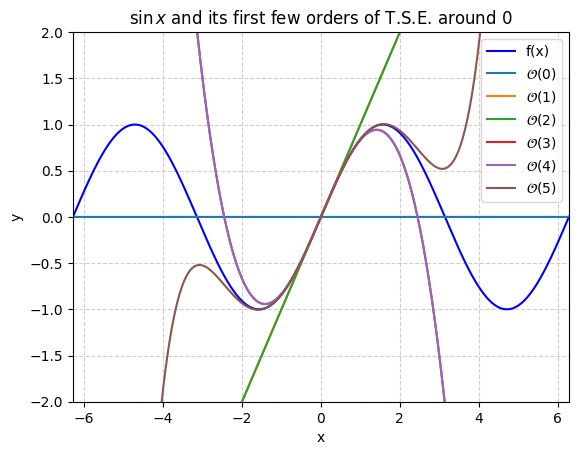

In [20]:
ol = np.arange( 0 , 6 , 1 )


plt.figure()

plt.plot ( arr , fx , label = 'f(x)' , color = 'b')

for ord in ol :

    plt.plot ( arr , tse ( ord , arr ) ,
    label = r'$\mathcal{O}$('+str(ord)+')' )


plt.xlabel('x')
plt.ylabel('y')

plt.title ( r'$\sin{x}$ and its first few orders of T.S.E. around 0' )

plt.xlim(-2*np.pi,2*np.pi)
plt.ylim(-2,2)

plt.grid ( ls = '--' , alpha = 0.6 )
plt.legend()

plt.show()